In [1]:
# :)
import matplotlib.pyplot as plt
import numpy as np
import numba as nb
import ODEsolver as solve
from run import g, temp, gs, gss
from run import with_spline_ODE, steps_taken
import Emma as E

In [2]:
E.sterile_production(1000, 'electron', 0.064, 10**(-10), 7.6e-4, make_plot=False, folder_name="Neutrino Data")

0.135015759176325

In [3]:
E.sterile_production(1000, 'muon', 0.064, 10**(-10), 7.6e-4, make_plot=False, folder_name="Neutrino Data")

0.13513219493798276

In [4]:
E.sterile_production(1000, 'tau', 0.064, 10**(-10), 13e-4, make_plot=False, folder_name="Neutrino Data")

0.20524076872197522

## $\Omega_s h^2$ vs. $L_0$

In [5]:
lep_values = np.linspace(5e-4, 60e-4, 10)
oh2_values_e = np.zeros(len(lep_values))
oh2_values_mu = np.zeros(len(lep_values))
oh2_values_tau = np.zeros(len(lep_values))

for i in range(len(lep_values)):
    oh2_values_e[i] = E.sterile_production(1000, 'electron', 0.064, 10**(-10), lep_values[i], make_plot=False, folder_name="Neutrino Data")
    oh2_values_mu[i] =E.sterile_production(1000, 'muon', 0.064, 10**(-10), lep_values[i], make_plot=False, folder_name="Neutrino Data")
    oh2_values_tau[i] =E.sterile_production(1000, 'tau', 0.064, 10**(-10), lep_values[i], make_plot=False, folder_name="Neutrino Data")

Text(0, 0.5, '$\\Omega_s h^2$')

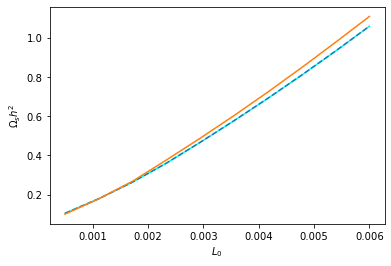

In [6]:
plt.plot(lep_values, oh2_values_e, color = 'cyan')
plt.plot(lep_values, oh2_values_mu,'--')
plt.plot(lep_values, oh2_values_tau)
plt.xlabel('$L_0$')
plt.ylabel('$\Omega_s h^2$')

## Same $L_0$, different flavor

In [7]:
E.sterile_production(1000, 'electron', 0.064, 10**(-10), 7.6e-4, make_plot=False, folder_name="Neutrino Data")
E.sterile_production(1000, 'muon', 0.064, 10**(-10), 7.6e-4, make_plot=False, folder_name="Neutrino Data")
E.sterile_production(1000, 'tau', 0.064, 10**(-10), 7.6e-4, make_plot=False, folder_name="Neutrino Data")

0.1328261328973663

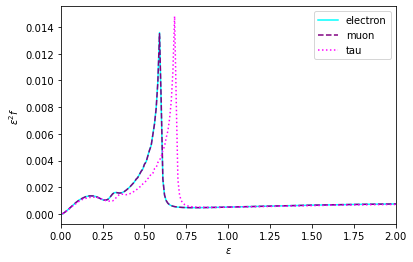

In [8]:
dat_e = np.load('electronx0.00076x1e-10.npz')
dat_mu = np.load('muonx0.00076x1e-10.npz')
dat_tau = np.load('taux0.00076x1e-10.npz')

fe_e = dat_e['final_distribution']
fe_mu = dat_mu['final_distribution']
fe_tau = dat_tau['final_distribution']
epsilon = dat_e['epsilon']
plt.figure()
plt.plot(epsilon, epsilon**(2)*fe_e, color = 'cyan' )
plt.plot(epsilon, epsilon**(2)*fe_mu, '--', color = 'purple')
plt.plot(epsilon, epsilon**(2)*fe_tau, ':', color = 'magenta')
plt.xlabel(r'$\epsilon$')
plt.ylabel(r"$\epsilon^2 f$")
plt.xlim(0,2)
plt.legend(['electron', 'muon', 'tau'])

## Same flavor, different $L_0$

In [9]:
E.sterile_production(1000, 'electron', 0.064, 10**(-10), 7.6e-4, make_plot=False, folder_name="Neutrino Data")
E.sterile_production(1000, 'electron', 0.064, 10**(-10), 11e-4, make_plot=False, folder_name="Neutrino Data")
E.sterile_production(1000, 'electron', 0.064, 10**(-10), 13e-4, make_plot=False, folder_name="Neutrino Data")

0.20494307878415438

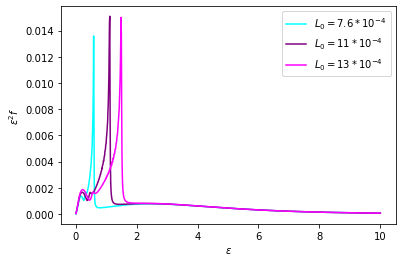

In [10]:
data_e = np.load('electronx0.00076x1e-10.npz')
data_mu = np.load('electronx0.0011x1e-10.npz')
data_tau = np.load('electronx0.0013x1e-10.npz')

fe_e = data_e['final_distribution']
fe_mu = data_mu['final_distribution']
fe_tau = data_tau['final_distribution']
epsilon = data_e['epsilon']
plt.figure()
plt.plot(epsilon, epsilon**(2)*fe_e, color = 'cyan' )
plt.plot(epsilon, epsilon**(2)*fe_mu,  color = 'purple')
plt.plot(epsilon, epsilon**(2)*fe_tau, color = 'magenta')
plt.xlabel(r'$\epsilon$')
plt.ylabel(r"$\epsilon^2 f$")
#plt.xlim(0.8,1.75)
plt.legend(['$L_0 = 7.6*10^{-4}$', '$L_0 = 11*10^{-4}$', '$L_0 = 13*10^{-4}$'])

note: why does it look like $L_0 = 11*10^{-4}$ has the highest resonance?

## Read Me File:

The function $\textbf{sterile_production}$ has inputs: N; flavor (of active species); sterile mass; vacuum mixing angle; initial lepton number; and an input to produce (make_plot=True) or not produce (make_plot=False) the sterile distributions ($\epsilon^2f_{\epsilon}$ vs $\epsilon$ plots).

$\textbf{sterile_production}$ takes in initial conditions and flavor specification and runs steps_taken, plots the produced $\nu_s$ and $\overline{\nu}_s$ distributions, calculates the produced energy density, $\Omega_s h^2$ value, and creates an .npz file with all the data. The .npz file is named as: "flavor x inital lepton number x mixing angle."